In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
df = pd.read_csv('generated_data.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Female,24,72313,1
1,15624511,Female,41,79154,0
2,15624512,Female,32,86996,1
3,15624513,Female,28,44149,0
4,15624514,Male,37,18780,1


In [5]:
df = df[['Age','EstimatedSalary','Purchased']]

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,24,72313,1
1,41,79154,0
2,32,86996,1
3,28,44149,0
4,37,18780,1


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
X

,Age,EstimatedSalary
0,24,72313
1,41,79154
2,32,86996
3,28,44149
4,37,18780
...,...,...
315,62,57705
316,43,41025
317,63,92184
318,44,46509


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(320, 2)

In [10]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
#X_train.shape

In [12]:
# batch gradient descent required a huge ram but faster than stocastic gradient descent
# will take less time from than stocastic gradient descent 
# because number of epoch = number of times weight update (weight update times will be number of epoch for batch gd )
# in sgd you will take update = number of datapoints(rows) * number of epoch

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Create a Sequential model
model = Sequential()

# Add an Input layer to specify the shape of the input
model.add(Input(shape=(2,)))  # Define input shape as (2,)

# Add Dense layers
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary to see the structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

# Explanation of model.summary()

In the model.summary() output, the "Param #" column indicates the number of trainable parameters for each layer in the model. Here's a brief explanation of what these parameters represent:

Dense Layer Parameters:
Each Dense layer has parameters for the weights and biases.
For a Dense layer with units number of neurons and an input of input_dim, the number of weight parameters is units * input_dim.
Each neuron also has a bias term, adding units parameters.
To break it down for each layer in your model:

First Dense Layer (dense):

Input Shape: (2,)
Output Shape: (10,)
Weights: This layer has 2 inputs and 10 neurons, so there are 2 * 10 = 20 weight parameters.
Biases: There are 10 neurons, so there are 10 bias parameters.
Total Parameters: 20 (weights) + 10 (biases) = 30 parameters.
Second Dense Layer (dense_1):

Input Shape: (10,)
Output Shape: (10,)
Weights: This layer has 10 inputs and 10 neurons, so there are 10 * 10 = 100 weight parameters.
Biases: There are 10 neurons, so there are 10 bias parameters.
Total Parameters: 100 (weights) + 10 (biases) = 110 parameters.
Third Dense Layer (dense_2):

Input Shape: (10,)
Output Shape: (1,)
Weights: This layer has 10 inputs and 1 neuron, so there are 10 * 1 = 10 weight parameters.
Biases: There is 1 neuron, so there is 1 bias parameter.
Total Parameters: 10 (weights) + 1 (bias) = 11 parameters.
In summary, the "Param #" in model.summary() reflects the total number of parameters in each layer, including both weights and biases, that are learnable during the training process.

In [13]:
# when you keep 1 (batch_size=1) its a scostic gradient descent
# means ek ek row ka ek batch (total batch will be 256 that is our rows in our data)
# weight is updating 256 times for each epoch. so total update = (256*number of epoch) # 256 are total rows
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
print("Total Time Taken : ",time.time() - start)

Epoch 1/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4666 - loss: 0.7149 - val_accuracy: 0.5000 - val_loss: 0.6971
Epoch 2/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5578 - loss: 0.6884 - val_accuracy: 0.6250 - val_loss: 0.6933
Epoch 3/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6369 - loss: 0.6800 - val_accuracy: 0.5938 - val_loss: 0.6923
Epoch 4/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6082 - loss: 0.6776 - val_accuracy: 0.5469 - val_loss: 0.6916
Epoch 5/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5920 - loss: 0.6723 - val_accuracy: 0.5625 - val_loss: 0.6909
Epoch 6/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6036 - loss: 0.6759 - val_accuracy: 0.5625 - val_loss: 0.6907
Epoch 7/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5389 - loss: 0.6902 - val_accuracy: 0.5625 - val_loss: 0.6906
Epoch 8/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5787 - loss: 0.6806 - val_accu

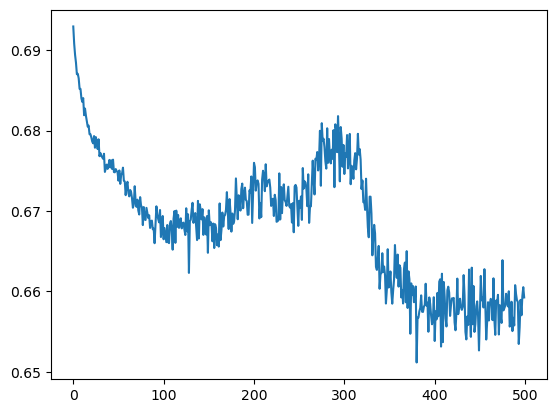

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [18]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\l\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# you find above warning kindly try below code for inputsahpe/input_dim error
from keras.models import Sequential
from keras.layers import Dense, Input

# Create a Sequential model
model = Sequential()

# Add an Input layer to specify the shape of the input
model.add(Input(shape=(2,)))  # Define input shape as (2,)

# Add Dense layers
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Print model summary to see the structure
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
#  batch gradint descent
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=320,validation_split=0.2)
print("Total Time Taken : ",time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5117 - loss: 0.6981 - val_accuracy: 0.5469 - val_loss: 0.7132
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step - accuracy: 0.5195 - loss: 0.6960 - val_accuracy: 0.5156 - val_loss: 0.7117
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.5234 - loss: 0.6948 - val_accuracy: 0.5156 - val_loss: 0.7107
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5156 - loss: 0.6938 - val_accuracy: 0.5156 - val_loss: 0.7096
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5234 - loss: 0.6930 - val_accuracy: 0.5156 - val_loss: 0.7089
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5195 - loss: 0.6923 - val_accuracy: 0.5156 - val_loss: 0.7082
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5195 - loss: 0.6917 - val_accuracy: 0.5156 - val_loss: 0.7074
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5156 - loss: 0.6912 - val_accuracy: 0.5156 - val_loss: 0.

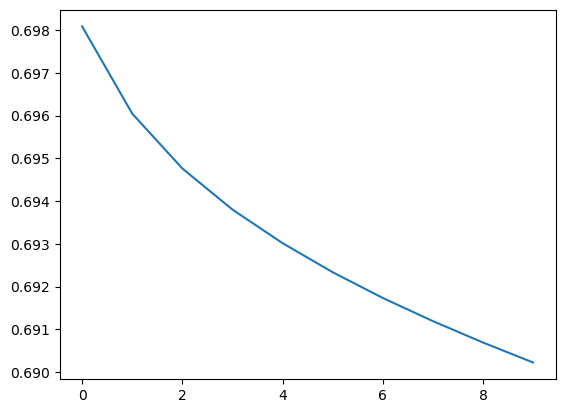

In [21]:
# batch losss
plt.plot(history.history['loss'])